#Лабораторная работа №2
ФИО: Брызгалова Юлия Александровна
Группа: БИВТ-21-4

Что необходимо сделать:
В общих чертах просто провести EDA (но обычно это не бывает просто)

##Читайте задание внимательно
Исходные данные:

Название датасета: Medical Cost Personal Datasets
Ссфлка на датасет: https://www.kaggle.com/datasets/mirichoi0218/insurance

Ход работы:
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от - &infin; до + &infin;) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между Y-переменной и X-переменной)
9. *extra*
Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная X<sub>n</sub>, по оси OY -- переменная X<sub>k</sub>. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

Библиотеки

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0. Иморт данных 

In [6]:
data = pd.read_csv('insurance.csv', sep = ',')  # если нужно, можно поменять разделитель

## 1. Название датасета - Medical Cost Personal Datasets

## 2. Описание  постановки задачи

В данном датасете есть 1338 наблюдений и 7 признаков. 
Постановка задачи: исследовать данные датасета Medical Cost Personal Datasets, найти зависимость 5 признаков от целевой переменной. В качестве целевой переменной будет принят 'charges' - медицинские расходы, оплачиваемые страховой, выбранные 5 признаков: age, sex, bmi, children, smoker.
Набор переменных: 
    1. Age - возраст: минимальное значение = 18, максимальное значение = 64;
    2. Bmi - индекс массы тела: вес тела относительно роста: минимальное значение = 15.96, максимальное значение = 53.13, идеальное значение принадлежит диапазону [18,5; 24,9];
    3. Children - кол-во детей, на которых распространяется мед страховка, кол-во иждевенцев: минимальное значение = 0, максимальное значение = 5;
    4. Charges - медицинские расходы, оплачиваемые медицинской страховой: минимальное значение = 1121.8739, максимальное значение = 63770.42801
    5. Sex - пол: female, male;
    6. Smoker - курение: yes, no;
    7. Region - регион проживания: northeast, southeast, southwest, northwest.
    В качестве целевого события будет выбран Charges, тогда полный набор признаков: age, bmi, children, sex, smoker, region.
    Целевое событие является непрерывным, принадлежит диапазону значений от 1121.8739 до 63770.42801.

In [16]:
# Просмотр информации
# Кол-во наблюдений и признаков
data.shape

(1338, 7)

In [5]:
# head(n)- метод вывода информации по первым n строкам 
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
# info() - метод вывода общей информации о датасете: тип каждого признака, наличие непустых значений
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# describe() - метод, выдающий статистику по каждому числовому признаку
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Кол-во отсутствующих данных по каждому признаку
# isnull() - метод, выдающий массив: пропуск(NaN) = True
# sum() - метод, суммирующий True
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 3. Распределение целевой переменной, количество уникальных значений целевой переменной

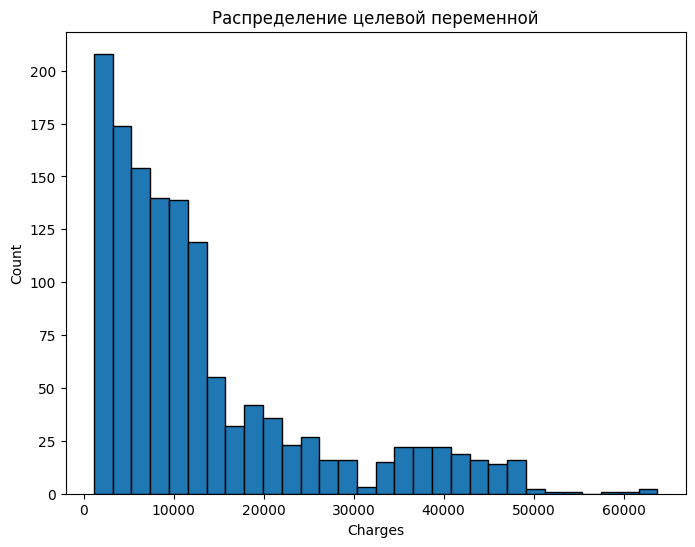

Количество уникальных значений целевой переменной: 1337


charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [82]:
# Построение распределения charges - целевой переменной в виде гистограммы
plt.figure(figsize = (8, 6))
plt.hist(data['charges'], edgecolor = 'black', bins = 30) 
plt.title('Распределение целевой переменной')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Количество уникальных значений целевой переменной
# nunique() - функция, вычисляющая кол-во уникальных записей
unique_charges = data['charges'].nunique()
print(f'Количество уникальных значений целевой переменной: {unique_charges}')
data['charges'].unique()
# value_counts() - функция, возвращающая частоту встречающихся значений
data['charges'].value_counts()

Промежуточные выводы: гистограмма, отображающие данные медицинских расходов, покрывающих медицинской страховой, смещена влево, значит, наблюдается положительная асимметрия. Наибольшее число респондентов имеют наименьшее значение целевой переменной. С увеличении значения индивидуальных медицинских расходов, покрываемых страховой, количество респондентов умньшается.
Кол-во уникальных значениий целевой переменной: 1337.
Так как всего записей 1338, то можно сделать вывод о том, что всего одно значение встречается дважды: 1639.56310.

## 4. Основные статистики по переменным в датасете 

In [55]:
data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 5. Основная информация по датасету 

Кол-во колонок: 7;
Типы колонок: int64, object, float64;
Кол-во non-null элементов в каждой колонке равно 1338.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 6. Количество пропусков элементов по всем колонкам

В данном датасете в каждой колонке отсутствуют пропуски, то есть данные представлены в полном объеме.

In [56]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 7. Гистограммы 5 любх признаков: age, sex, bmi, children, smoker 

- Распределение признака age не является ни нормальным, ни равномерным. Гистограмма смещена влево - положительная ассиметрия. Большинство респондентов датасета имеют возраст меньший 20 лет. Для других значений признака age число респондентов варьируется от 20 до 60.
- Распределение признака sex показывает примерно равное число мужчин и женщин, чьи данные используются в датасете.
- Распределение признака bmi - гистограмма близкая к нормальному закону распределения, то есть чаще всего встречаются средние значения показателей и, чем больше отклонение от средней величины, тем меньше вероятность. Норма bmi составляет от [18,5; 24,9], на гистограмме видно, что данному диапазону принадлежит небольшое количество респондентов.
- Распределение children иллюстрирует тот факт, что большинство респондентов имеют 1 ребенка. На графике видно: чем больше детей, тем меньше количество респондентов. Гистограмма смещена влево.
- Распределение smoker иллюстрирует гистограмму, где большинство респондентов не являются курильщиками,а количество курящих не достигает 400.

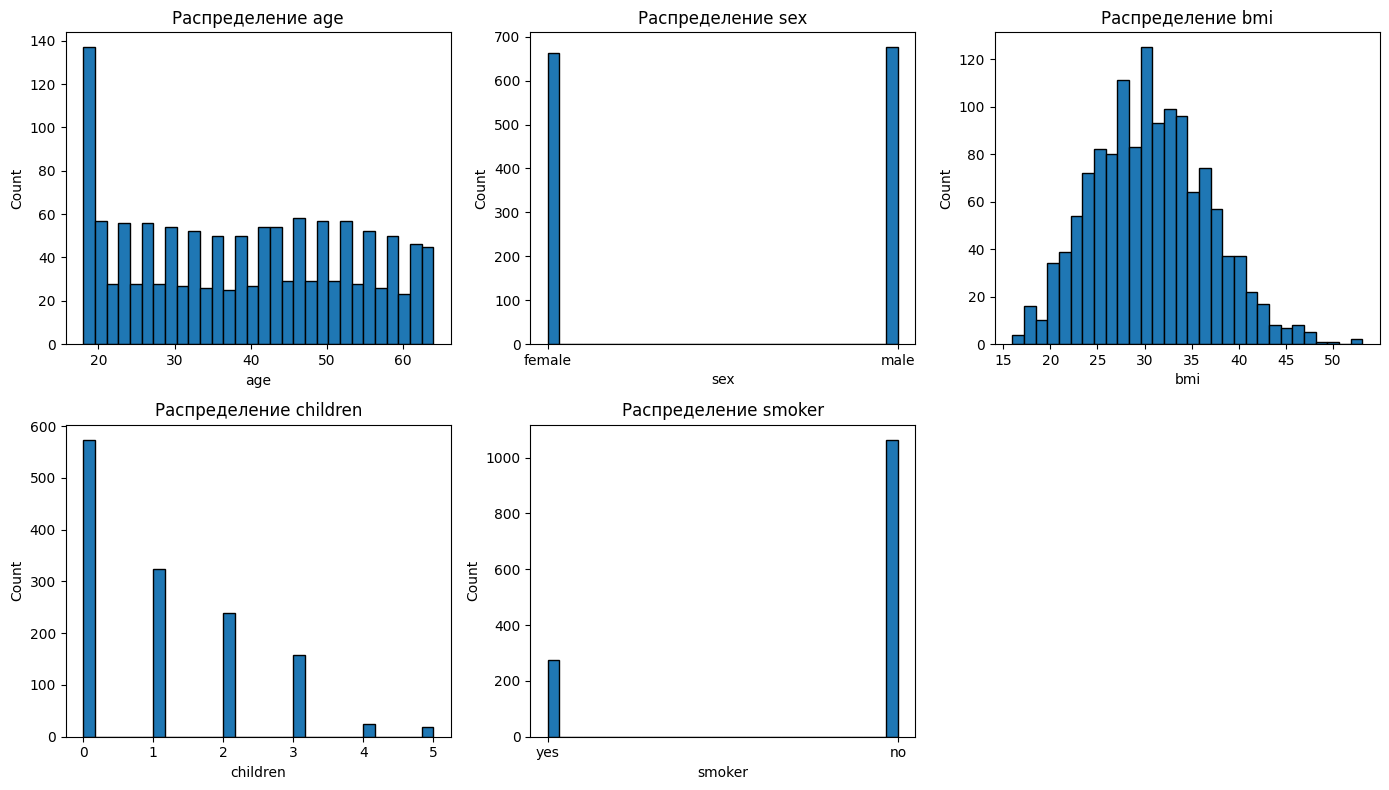

In [90]:
signs = ['age', 'sex', 'bmi', 'children', 'smoker']
plt.figure(figsize = (14, 8))
for i in range (len(signs)):
    feature = signs[i]
    plt.subplot(2, 3, i + 1)
    plt.hist(data[feature], edgecolor = 'black', bins = 30)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 8. Графики зависимости 5 переменных: age, sex, bmi, children, smoker от целевой переменной

- График зависимости age от charges позволяет сделать вывод о том, что с увеличением age целевая переменная charges возрастает: прямопропорциональная зависимсоть.
- График зависимости sex от charges позволяет сделать вывод о том, что медицинская страхвая тратит больше средств на оплату страховых случаев мужчин.
- График зависимости bmi от charges позволяет сделать вывод о том, что bmi не зависит от charges, так как распределение данных не соответствует ни нормальному, ни равномерному законам распределения.
- График зависимости children от charges позволяет сделать вывод о том, что количество детей влияет на charges: чем больше детей, тем меньше charges.
- График зависимости smoker от charges позволяет сделать вывод о том, что не курящие люди имеют более низкие медицинские расходы, оплачиваемые страховой.
    

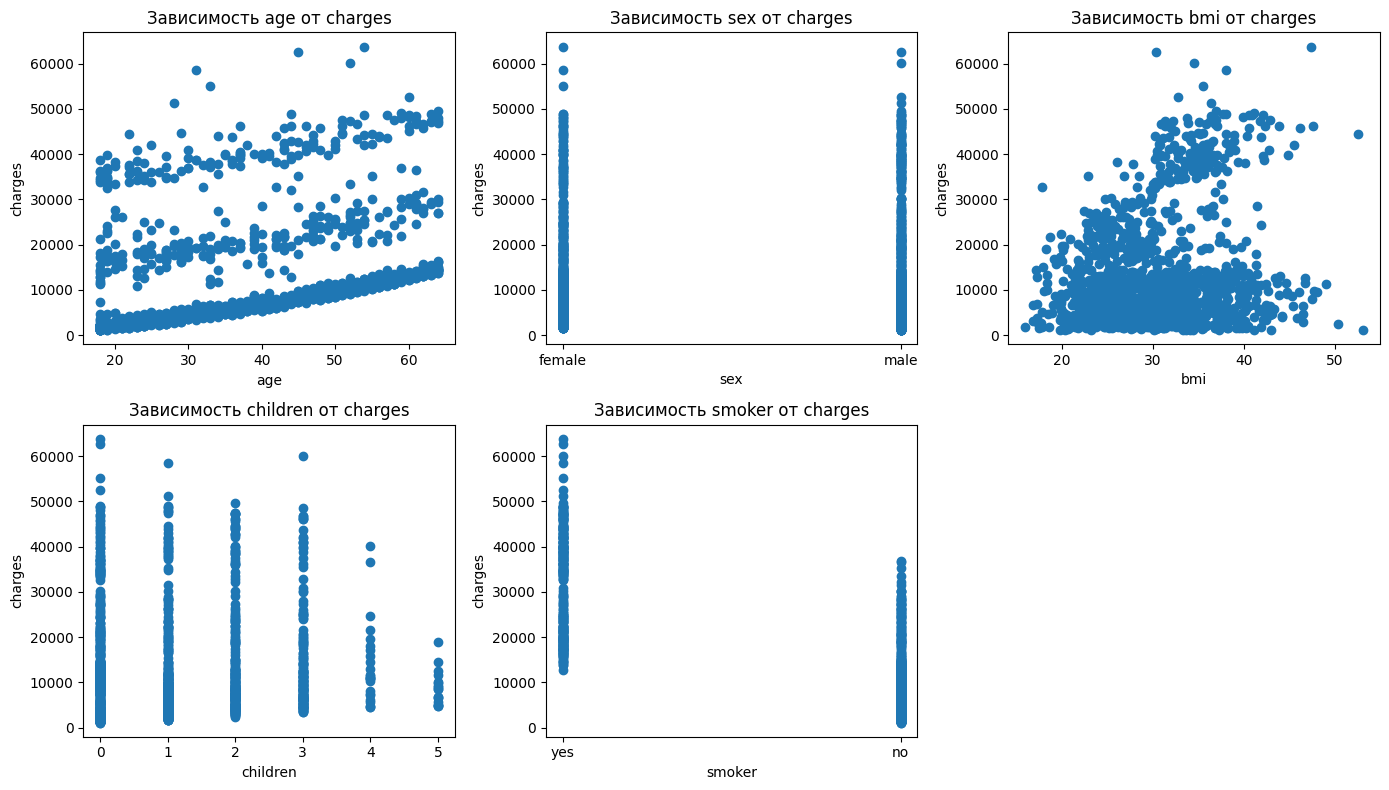

In [114]:
import matplotlib.pyplot as plt
signs = ['age', 'sex', 'bmi', 'children', 'smoker']
plt.figure(figsize = (14, 8))
for i in range (len(signs)):
    feature = signs[i]
    plt.subplot(2, 3, i+1)
    plt.scatter(data[feature], data['charges'])
    plt.title(f'Зависимость {feature} от charges')
    plt.xlabel(feature)
    plt.ylabel('charges')
plt.tight_layout()
plt.show()

## 9. extra 
Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная X<sub>n</sub>, по оси OY - переменная X<sub>k</sub>. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

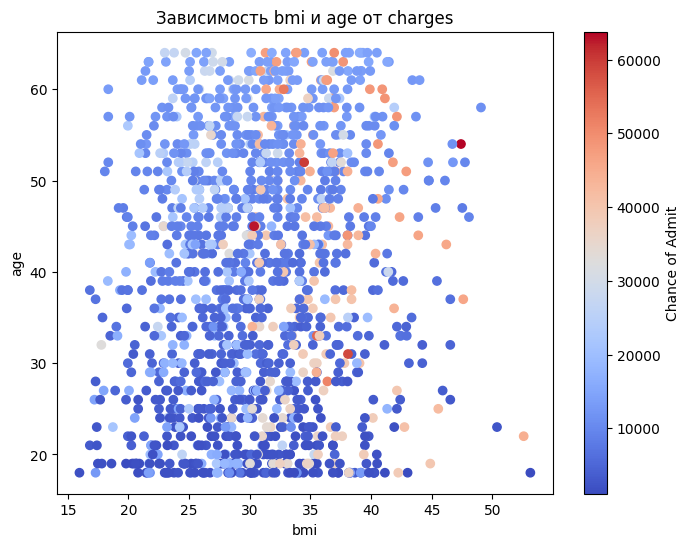

In [20]:
# Зависимсоть двух количественных переменных от целевой переменной
feature_x = 'bmi'
feature_y = 'age'
plt.figure(figsize = (8, 6))
scatter = plt.scatter(data[feature_x], data[feature_y], c = data['charges'], cmap = 'coolwarm')
plt.colorbar(scatter, label = 'Chance of Admit')
plt.title(f'Зависимость {feature_x} и {feature_y} от charges')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

Из графика зависимсоти можно сделать вывод о том, что зависимость двух переменных одновременно от целевой переменной небольшая, есть небольшое количество данных, обладающих большой корреляционной зависимостью, вероятнее всего это выбросы.

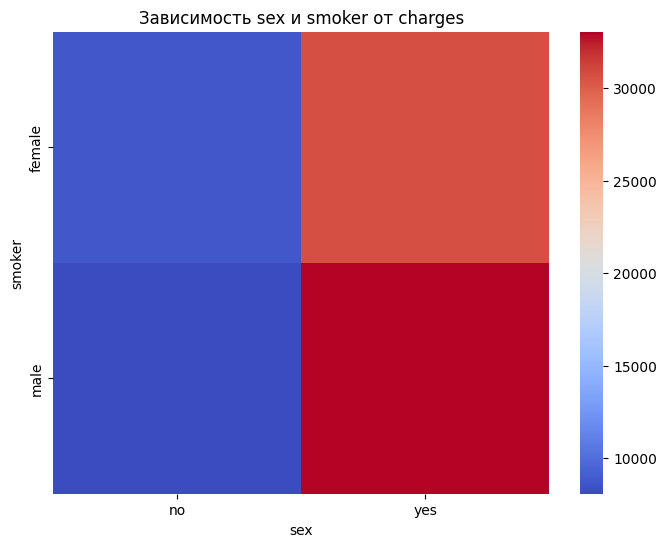

In [23]:
# Зависимость двух категориальных признаков от целевой переменной
import seaborn as sns
feature_x = 'sex'
feature_y = 'smoker'
data_pivot = pd.pivot_table(data, values='charges', index=data[feature_x], columns=data[feature_y]) # pivot_table - функция для подготовки данных, 
                                                                                   # data_pivot - двумерная таблица: значение столбца charges группируется по значениям столбцов sex и smoker.
                                                                                   # По строкам указаны указаны значения столбца sex, по столбцам - smoker, в каждой ячейке сожержится ср.знач. столбца charges
#print(data_pivot)
plt.figure(figsize = (8, 6))
sns.heatmap(data_pivot, cmap='coolwarm') # heatmap() - функция построения тепловой карты. Числовые значения отображаются цветами. Самый яркий цвет - самое высокое значение.
plt.xlabel(feature_y)
plt.ylabel(feature_x)
plt.title(f'Зависимость {feature_x} и {feature_y} от charges')
plt.show()